In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\93513\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
C:\Users\93513\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# generate two class dataset
data = pd.read_csv("10476 - 15 features.csv")
data.tail()

data=data.drop(['No'],axis=1)
# Split target and features
X = data.drop(['IS'],axis=1)
X
y = data['IS']
y = y.astype(int)
y
print(X.shape)
print(y.shape)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
X_features = X
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=5)

(10476, 15)
(10476,)


In [4]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB



# logistic regression
model1 = LogisticRegression(C=0.21)
# knn
model2 = KNeighborsClassifier(n_neighbors=42)
# RF
model3 = RandomForestClassifier(random_state=25,criterion='entropy',n_estimators=198)

# XGBoost
model4 = XGBClassifier(learning_rate=0.01, n_estimators=1000, silent=0, gamma=0.2, subsample=0.75, 
                       objective='binary:logistic', reg_alpha=1, reg_lambda=1,seed=27,
                      max_depth=5, min_child_weight=1)

## elastic net
##model5 = ElasticNet(alpha=0.001, l1_ratio=0.1)

# neural network
model6 = MLPClassifier(alpha=0.01, hidden_layer_sizes=19)

# GaussianNB
model7=GaussianNB() ##因为唯一参数 var_smoothing设置为非默认值时， evaluation metrics的值很不理想

## 所以此处直接就是 by default 来设置

In [5]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
# model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
# pred_prob5 = model5.predict(X_test)
pred_prob6 = model6.predict_proba(X_test)
pred_prob7 = model7.predict_proba(X_test)

[15:01:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\93513\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from matplotlib import cm

Text(0.5, 1.0, 'Logistic Regression')

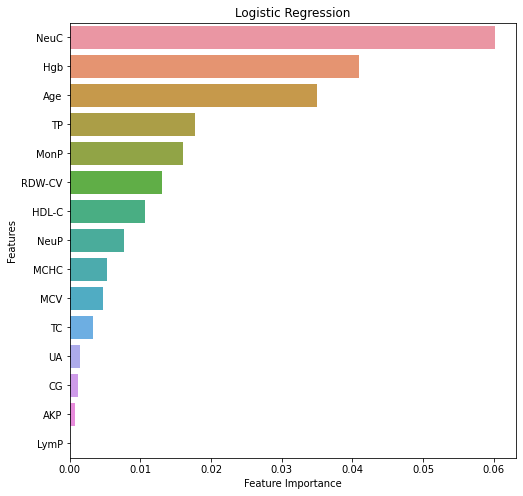

In [7]:
# 1 - logistic regression
results1 = permutation_importance(model1, X, y, scoring='accuracy')
# get importance
importance1 = abs(results1.importances_mean)
feat_importances1=pd.Series(importance1,index=X_features.columns)
head_lst1 = X_features.columns
importance1 = pd.DataFrame({'head':head_lst1,'importance':feat_importances1})
importance1 = importance1.sort_values(by=['importance'],ascending=False)

plt.gcf().set_size_inches(8,8)
sns.barplot(x='importance',y='head',data=importance1)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('Logistic Regression')

Text(0.5, 1.0, 'K-Nearest Neighbor')

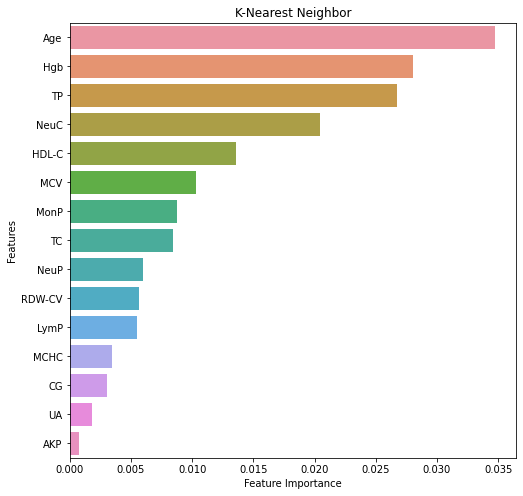

In [8]:
# 2 - k-NN
results2 = permutation_importance(model2, X, y, scoring='accuracy')
# get importance
importance2 = abs(results2.importances_mean)
feat_importances2=pd.Series(importance2,index=X_features.columns)
head_lst2 = X_features.columns
importance2 = pd.DataFrame({'head':head_lst2,'importance':feat_importances2})
importance2 = importance2.sort_values(by=['importance'],ascending=False)

plt.gcf().set_size_inches(8,8)
sns.barplot(x='importance',y='head',data=importance2)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('K-Nearest Neighbor')

Text(0.5, 1.0, 'Random Forest')

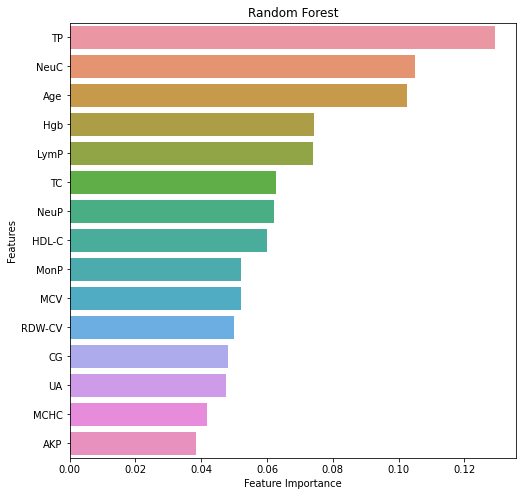

In [9]:
# 3 - RF
feat_importances3=model3.feature_importances_
head_lst3 = X_features.columns
importance3 = pd.DataFrame({'head':head_lst3,'importance':feat_importances3})
importance3 = importance3.sort_values(by=['importance'],ascending=False)

plt.gcf().set_size_inches(8,8)
sns.barplot(x='importance',y='head',data=importance3)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('Random Forest')

Text(0.5, 1.0, 'Random Forest')

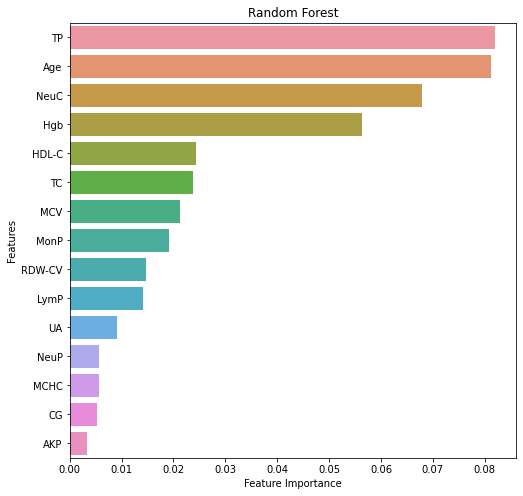

In [10]:
# 3' - RF- calculate the feature importance not using default-weight-gain, but using accuracy for consistency
results32 = permutation_importance(model3, X, y, scoring='accuracy')
# get importance
importance32 = results32.importances_mean
feat_importances32=pd.Series(importance32,index=X_features.columns)
head_lst32 = X_features.columns
importance32 = pd.DataFrame({'head':head_lst32,'importance':feat_importances32})
importance32 = importance32.sort_values(by=['importance'],ascending=False)

plt.gcf().set_size_inches(8,8)
sns.barplot(x='importance',y='head',data=importance32)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('Random Forest')

Text(0.5, 1.0, 'XGBoost')

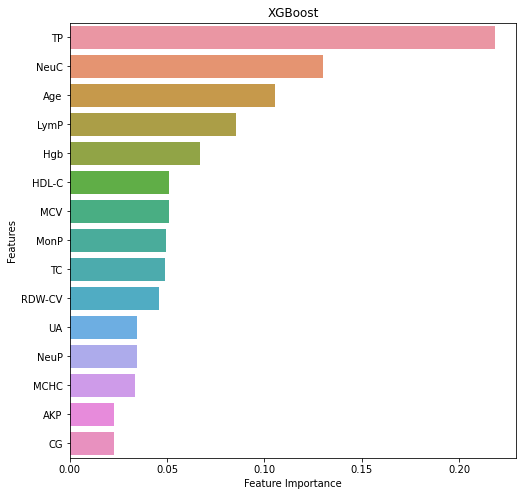

In [11]:
# 4- XGBoost
feat_importances4 = model4.feature_importances_
head_lst4 = X_features.columns
importance4 = pd.DataFrame({'head':head_lst4,'importance':feat_importances4})
importance4 = importance4.sort_values(by=['importance'],ascending=False)

plt.gcf().set_size_inches(8,8)
sns.barplot(x='importance',y='head',data=importance4)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('XGBoost')

Text(0.5, 1.0, 'XGBoost')

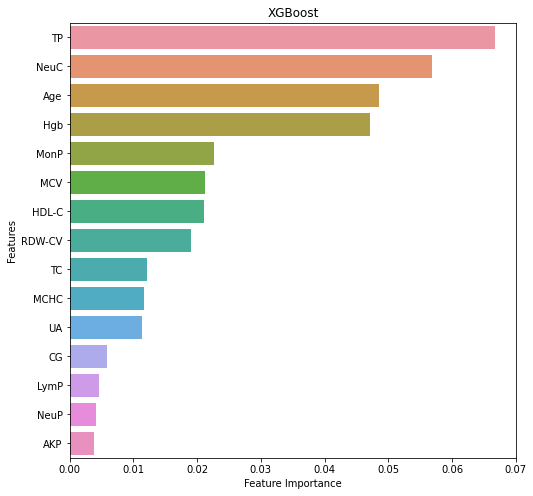

In [12]:
# 4' - XGBoost- calculate the feature importance not using default-weight, but using accuracy
results42 = permutation_importance(model4, X, y, scoring='accuracy')
# get importance
importance42 = results42.importances_mean
feat_importances42=pd.Series(importance42,index=X_features.columns)
head_lst42 = X_features.columns
importance42 = pd.DataFrame({'head':head_lst42,'importance':feat_importances42})
importance42 = importance42.sort_values(by=['importance'],ascending=False)

plt.gcf().set_size_inches(8,8)
sns.barplot(x='importance',y='head',data=importance42)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('XGBoost')

Text(0.5, 1.0, 'Neural Network')

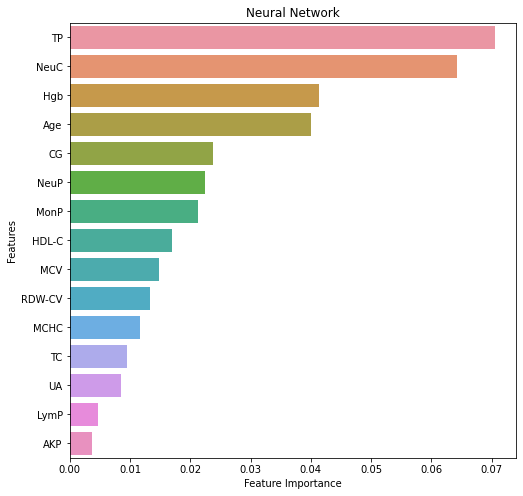

In [13]:
# 5 (model6) - NN (in this code file, is model6)

results6 = permutation_importance(model6, X, y, scoring='accuracy')
# get importance
importance6 = results6.importances_mean

# logistic regression
feat_importances6=pd.Series(importance6,index=X_features.columns)
head_lst6 = X_features.columns
importance6 = pd.DataFrame({'head':head_lst6,'importance':feat_importances6})
importance6 = importance6.sort_values(by=['importance'],ascending=False)

plt.gcf().set_size_inches(8,8)
sns.barplot(x='importance',y='head',data=importance6)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('Neural Network')

Text(0.5, 1.0, 'Gaussian Naive Bayes')

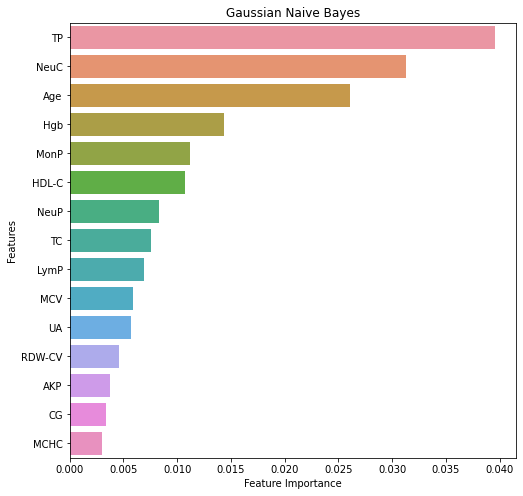

In [14]:
# 6 (model7) - GaussianNB (in this code file, is model7)

results7 = permutation_importance(model7, X, y, scoring='accuracy')
# get importance
importance7 = abs(results7.importances_mean)

# logistic regression
feat_importances7=pd.Series(importance7,index=X_features.columns)
head_lst7 = X_features.columns
importance7 = pd.DataFrame({'head':head_lst7,'importance':feat_importances7})
importance7 = importance7.sort_values(by=['importance'],ascending=False)

# key=pd.Series.abs,
#data7=importance7[importance7['importance']>0]
# data7=abs('importance7')
plt.gcf().set_size_inches(8,8)
sns.barplot(x='importance',y='head',data=importance7)
plt.xlabel('Feature Importance', fontsize=10)
plt.ylabel('Features')
plt.title('Gaussian Naive Bayes')

In [15]:
## Feature imporatance plot is conducted using the whole dataset (X and y), not the test set specifically

In [16]:
## feature importances

from sklearn.inspection import permutation_importance
from matplotlib import cm

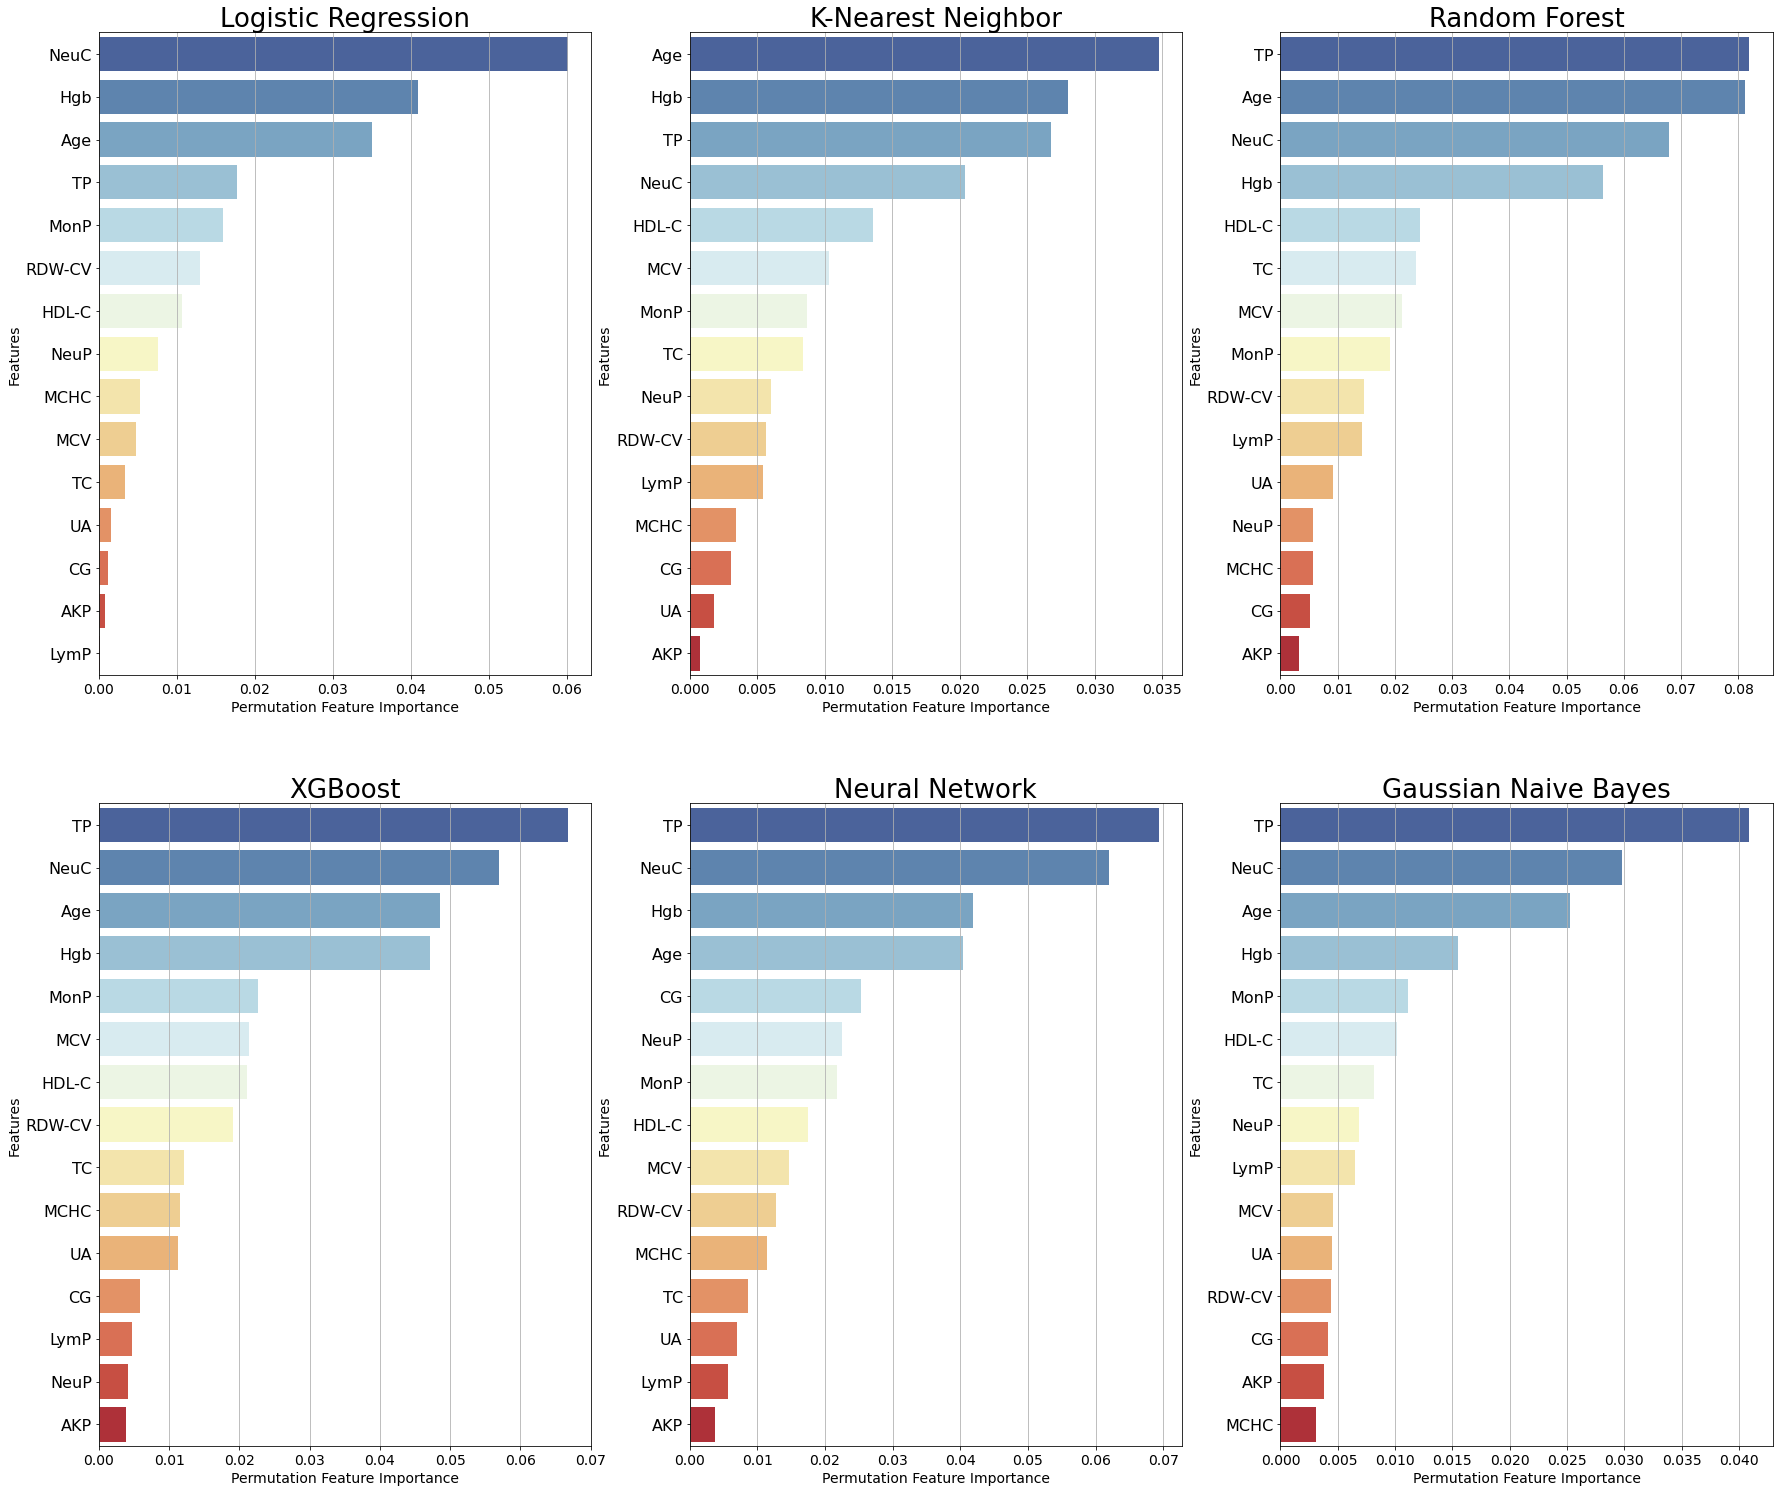

In [17]:
fig,subs=plt.subplots(2,3,figsize=(30, 26))

# 1 - logistic regression

plt.subplot(231)
sns.barplot(x='importance',y='head',data=importance1,palette="RdYlBu_r")
plt.ylabel('Features', fontsize=14)
plt.xlabel('Permutation Feature Importance', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.title('Logistic Regression', fontsize=26)
plt.grid(axis='x')



# 2 - knn

plt.subplot(232)
sns.barplot(x='importance',y='head',data=importance2,palette="RdYlBu_r")
plt.ylabel('Features', fontsize=14)
plt.xlabel('Permutation Feature Importance', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.title('K-Nearest Neighbor', fontsize=26)
plt.grid(axis='x')



# 3 - RF !! We use permutation importance here by calculating "accuracy" for the purpose of consistency

plt.subplot(233)
sns.barplot(x='importance',y='head',data=importance32,palette="RdYlBu_r")
plt.ylabel('Features', fontsize=14)
plt.xlabel('Permutation Feature Importance', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.title('Random Forest', fontsize=26)
plt.grid(axis='x')



# 4 -XGBoost !! We use permutation importance here by calculating "accuracy"

plt.subplot(234)
sns.barplot(x='importance',y='head',data=importance42,palette="RdYlBu_r")
plt.ylabel('Features', fontsize=14)
plt.xlabel('Permutation Feature Importance', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.title('XGBoost', fontsize=26)
plt.grid(axis='x')

# # 5 - EN
# colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])

# plt.subplot(235)
# label1 = ['MCH','MCHC','MCV','Hgb','NP','PCT','PLT','Age','MP','LC','RDW_DV','MPV','Sex','NC','RBC']
# plt.barh(label1
#         ,sorted(abs(model5.coef_),reverse=True)[:15],color=colors)
# plt.ylabel('Features')
# plt.xlabel('Feature Importances')
# plt.title('Elastic Net')
# plt.grid(axis='x')
# #np.abs(model5.coef_)



# 6 - NN
results6 = permutation_importance(model6, X, y, scoring='accuracy')
# get importance
importance6 = results6.importances_mean

# logistic regression
feat_importances6=pd.Series(importance6,index=X_features.columns)
head_lst6 = X_features.columns
importance6 = pd.DataFrame({'head':head_lst6,'importance':feat_importances6})
importance6 = importance6.sort_values(by=['importance'],ascending=False)

plt.subplot(235)
sns.barplot(x='importance',y='head',data=importance6,palette="RdYlBu_r")
plt.ylabel('Features', fontsize=14)
plt.xlabel('Permutation Feature Importance', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.title('Neural Network', fontsize=26)
plt.grid(axis='x')



# 7 - GaussianNB

# 6 (model7) - GaussianNB (in this code file, is model7)

results7 = permutation_importance(model7, X, y, scoring='accuracy')
# get importance
importance7 = abs(results7.importances_mean)

# logistic regression
feat_importances7=pd.Series(importance7,index=X_features.columns)
head_lst7 = X_features.columns
importance7 = pd.DataFrame({'head':head_lst7,'importance':feat_importances7})
importance7 = importance7.sort_values(by=['importance'],ascending=False)

plt.subplot(236)
sns.barplot(x='importance',y='head',data=importance7,palette="RdYlBu_r")
plt.ylabel('Features', fontsize=14)
plt.xlabel('Permutation Feature Importance', fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=14)
plt.title('Gaussian Naive Bayes', fontsize=26)
plt.grid(axis='x')

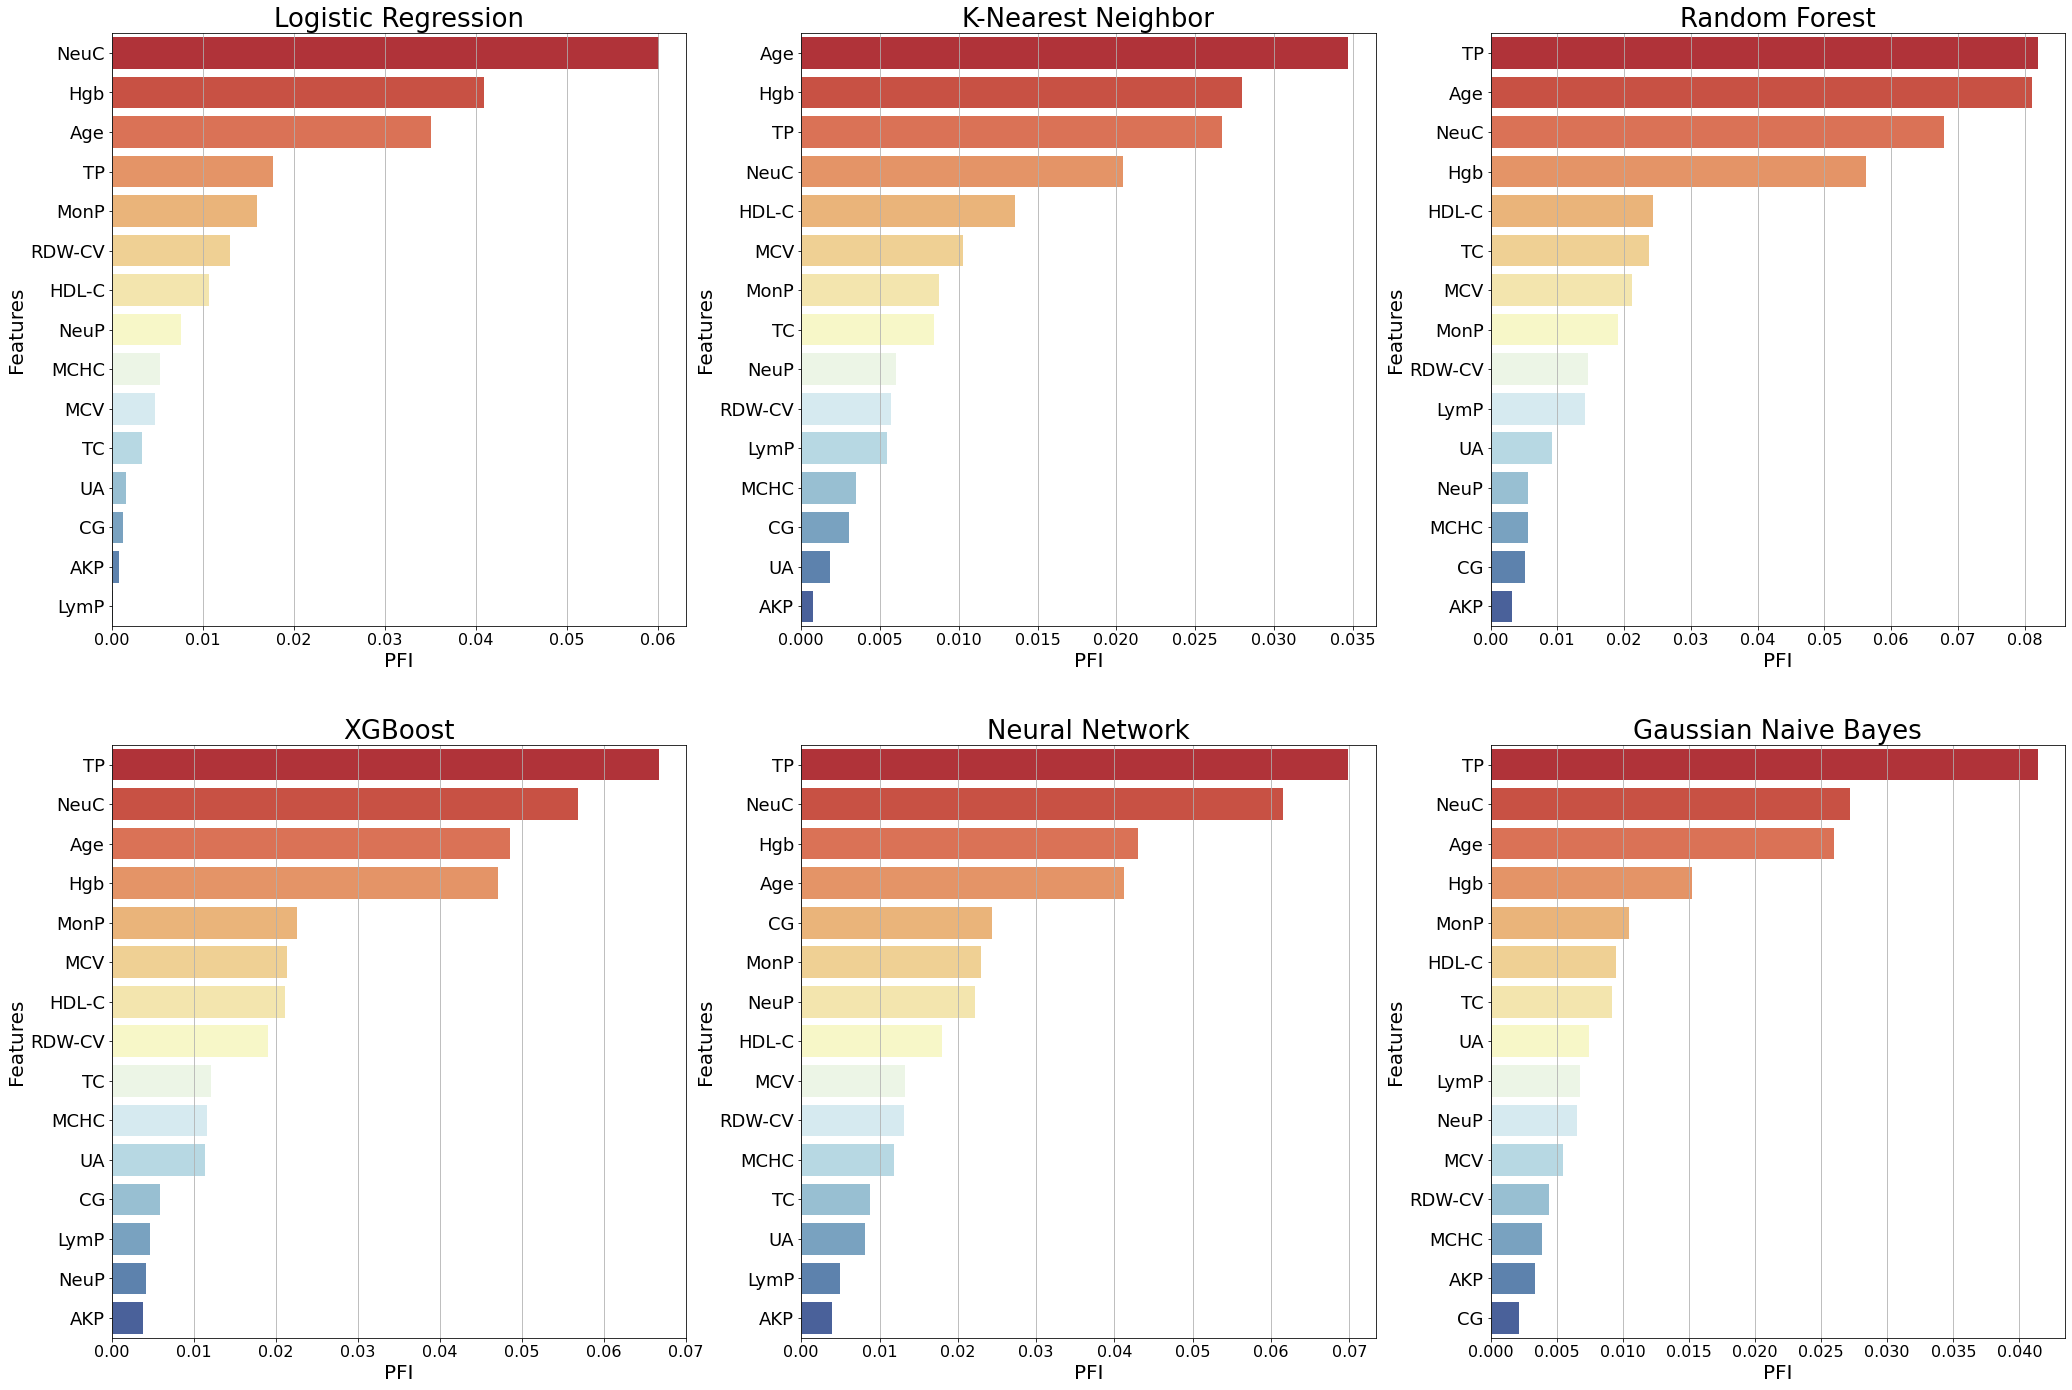

In [18]:
fig,subs=plt.subplots(2,3,figsize=(35, 24))

# 1 - logistic regression

plt.subplot(231)
sns.barplot(x='importance',y='head',data=importance1,palette="RdYlBu")
plt.ylabel('Features', fontsize=20)
plt.xlabel('PFI', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.title('Logistic Regression', fontsize=26)
plt.grid(axis='x')



# 2 - knn

plt.subplot(232)
sns.barplot(x='importance',y='head',data=importance2,palette="RdYlBu")
plt.ylabel('Features', fontsize=20)
plt.xlabel('PFI', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.title('K-Nearest Neighbor', fontsize=26)
plt.grid(axis='x')



# 3 - RF !! We use permutation importance here by calculating "accuracy" for the purpose of consistency

plt.subplot(233)
sns.barplot(x='importance',y='head',data=importance32,palette="RdYlBu")
plt.ylabel('Features', fontsize=20)
plt.xlabel('PFI', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.title('Random Forest', fontsize=26)
plt.grid(axis='x')



# 4 -XGBoost !! We use permutation importance here by calculating "accuracy"

plt.subplot(234)
sns.barplot(x='importance',y='head',data=importance42,palette="RdYlBu")
plt.ylabel('Features', fontsize=20)
plt.xlabel('PFI', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.title('XGBoost', fontsize=26)
plt.grid(axis='x')

# # 5 - EN
# colors = cm.jet([0.9,0.85,0.8,0.75,0.7,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.3,0.25,0.2])

# plt.subplot(235)
# label1 = ['MCH','MCHC','MCV','Hgb','NP','PCT','PLT','Age','MP','LC','RDW_DV','MPV','Sex','NC','RBC']
# plt.barh(label1
#         ,sorted(abs(model5.coef_),reverse=True)[:15],color=colors)
# plt.ylabel('Features')
# plt.xlabel('Feature Importances')
# plt.title('Elastic Net')
# plt.grid(axis='x')
# #np.abs(model5.coef_)



# 6 - NN
results6 = permutation_importance(model6, X, y, scoring='accuracy')
# get importance
importance6 = results6.importances_mean

# logistic regression
feat_importances6=pd.Series(importance6,index=X_features.columns)
head_lst6 = X_features.columns
importance6 = pd.DataFrame({'head':head_lst6,'importance':feat_importances6})
importance6 = importance6.sort_values(by=['importance'],ascending=False)

plt.subplot(235)
sns.barplot(x='importance',y='head',data=importance6,palette="RdYlBu")
plt.ylabel('Features', fontsize=20)
plt.xlabel('PFI', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.title('Neural Network', fontsize=26)
plt.grid(axis='x')



# 7 - GaussianNB

# 6 (model7) - GaussianNB (in this code file, is model7)

results7 = permutation_importance(model7, X, y, scoring='accuracy')
# get importance
importance7 = abs(results7.importances_mean)

# logistic regression
feat_importances7=pd.Series(importance7,index=X_features.columns)
head_lst7 = X_features.columns
importance7 = pd.DataFrame({'head':head_lst7,'importance':feat_importances7})
importance7 = importance7.sort_values(by=['importance'],ascending=False)

plt.subplot(236)
sns.barplot(x='importance',y='head',data=importance7,palette="RdYlBu")
plt.ylabel('Features', fontsize=20)
plt.xlabel('PFI', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.title('Gaussian Naive Bayes', fontsize=26)
plt.grid(axis='x')